
## data_month3
#### COMPUTER | psu 600W + LED 23" |                                          


In [1]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random


d = 31
time_a = pd.date_range('2016-12-01 00:00:00', periods=5760*d, freq='15S')
# print time_a
time_b = pd.date_range('2016-12-01 00:00:14', periods=5760*d, freq='15S')
# print time_b

conn= MySQLdb.connect("localhost","conn","hems")
c = conn.cursor()


####### set databases to empty #########
query_empty = """truncate table data_month3.Computer""" 
c.execute(query_empty)
print " data_month2.Computer are Empty!!! \n"

query = "SELECT watt FROM collected_info.4_Computer WHERE no >= '%s'   AND no <= '%s'; "% (0,1240)
df = pd.read_sql(query, conn)
# print df.watt[5]

#### Random the turning-on time appliances
def rand_turnon():
    duration_sec =  random.randint(10, 59)
    duration_min =  random.randint(10, 59)
    duration_hour1 = ['18'] * 4+['19'] * 6 + ['20'] * 46 + ['21'] * 41 +['22'] * 3     #SET Start 7-10 pm.
    duration_hour = random.choice(duration_hour1)     
    if 0 < duration_sec <= 15:
        k = 0
    elif 15 < duration_sec <= 30:
        k = 1
    elif 30 < duration_sec <= 45:
        k = 2
    else:
        k = 3
    off_item = (int(duration_hour)*240) + (int(duration_min)*4)+ k 
    print "time to turn-on appliacne on",duration_hour,":",duration_min,":",duration_sec,"equal to",off_item,"items"
    return off_item

 
#### Random the off-duration appliances 
def rand_duration():
    duration_sec =  random.randint(10, 59)
    duration_min =  random.randint(10, 59)
    duration_hour1 = ['1'] * 9 + ['2'] * 59 + ['3'] * 30 +['4'] * 1+['5'] * 1   
    duration_hour = random.choice(duration_hour1)   
    seconds = (int(duration_hour)*3600)+(duration_min*60)+duration_sec
    no_item = seconds/15
    print "consuming the appliance", duration_hour,"hours",duration_min,"minutes",duration_sec,"seconds that equal to",seconds,"seconds or",no_item,"items"
    return no_item

days = 0
j = 0
i = 0
print "\nDays :",days ,":",time_b[j].strftime('%a')
off_item = rand_turnon()  
no_item = rand_duration()  

while (j <= (5760*d)-1):  
    c.execute("INSERT INTO  data_month3.Computer (Timestamp, watt) VALUES (%s, %s)",(time_b[j],0))
    conn.commit()
    j += 1 
    
    while (off_item+(5760*(days)) <= j <= (no_item+off_item)+(5760*(days))):                   
        c.execute("INSERT INTO data_month3.Computer (Timestamp, watt) VALUES (%s, %s)",(time_b[j],df.watt[i]))
        conn.commit()
        i += 1 
        j += 1
        if (j == (no_item+off_item)+(5760*(days))):
            days +=1
            print "\nDays :",days ,":",time_b[j].strftime('%a')
            off_item = rand_turnon()  
            no_item = rand_duration() 
            i= 0   
                    
print "DONE!"


 data_month2.Computer are Empty!!! 


Days : 0 : Thu
time to turn-on appliacne on 21 : 54 : 45 equal to 5258 items
consuming the appliance 2 hours 16 minutes 21 seconds that equal to 8181 seconds or 545 items

Days : 1 : Fri
time to turn-on appliacne on 20 : 44 : 46 equal to 4979 items
consuming the appliance 1 hours 38 minutes 20 seconds that equal to 5900 seconds or 393 items

Days : 2 : Fri
time to turn-on appliacne on 21 : 14 : 20 equal to 5097 items
consuming the appliance 4 hours 50 minutes 36 seconds that equal to 17436 seconds or 1162 items

Days : 3 : Sun
time to turn-on appliacne on 20 : 26 : 21 equal to 4905 items
consuming the appliance 3 hours 41 minutes 23 seconds that equal to 13283 seconds or 885 items

Days : 4 : Mon
time to turn-on appliacne on 20 : 27 : 59 equal to 4911 items
consuming the appliance 2 hours 10 minutes 53 seconds that equal to 7853 seconds or 523 items

Days : 5 : Mon
time to turn-on appliacne on 20 : 28 : 29 equal to 4913 items
consuming the applianc

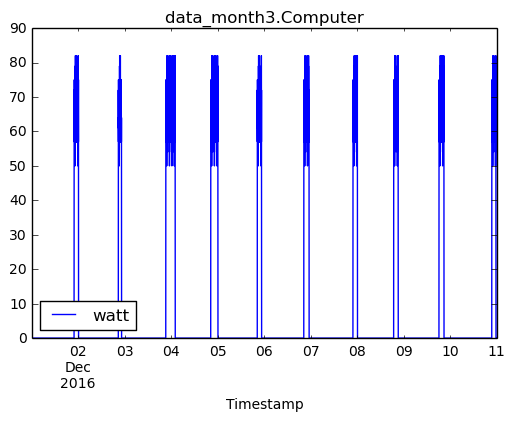

In [5]:
import pandas as pd
import MySQLdb
import numpy as np
import time
import datetime 
import random
import matplotlib.pyplot as plt
%matplotlib inline  


d = 31
time_a = pd.date_range('2016-12-01 00:00:00', periods=5760*d, freq='15S')
# print time_a
time_b = pd.date_range('2016-12-01 00:00:14', periods=5760*d, freq='15S')
# print time_b
# query = "SELECT watt FROM device.aircont WHERE Timestamp >= '%s'   AND Timestamp <= '%s'; "% (time_a[0],time_b[j-1])
query = "SELECT Timestamp,watt FROM data_month3.Computer WHERE Timestamp >= '%s' AND Timestamp <= '%s'; "% (time_a[0],time_b[5760*10])
df = pd.read_sql(query, conn, index_col=['Timestamp'])
fig,ax = plt.subplots()
ax.set_title('data_month3.Computer ')
df.plot(ax=ax )
plt.show()